In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [130]:
df=pd.read_csv('/content/customer_churn.csv')

In [131]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [132]:
df.drop('customerID',axis=1,inplace=True)

In [133]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [134]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [135]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [35]:
pd.to_numeric(df.TotalCharges)

ValueError: ignored

In [36]:
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x))


ValueError: ignored

In [136]:
df['TotalCharges']=pd.to_numeric(df.TotalCharges,errors='coerce')

In [137]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [160]:
df.dropna(inplace=True)

In [161]:
df.TotalCharges=pd.to_numeric(df.TotalCharges)

In [162]:
df.columns.unique()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [163]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [164]:
def print_unique_cols(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}:{df[column].unique()}')

In [165]:
print_unique_cols(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [166]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [167]:
print_unique_cols(df)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [168]:
df1=pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [169]:
print_unique_cols(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
PaperlessBilling:['Yes' 'No']
Churn:['No' 'Yes']


In [170]:
yes_no_cols=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_cols:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

In [171]:
print_unique_cols(df1)

gender:['Female' 'Male']


In [172]:
df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,Male,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,Male,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,Male,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,Female,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [173]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [174]:
df1.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [175]:
for col in df1:
  print(f'{col}:{df1[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]
InternetService_DSL:[1 0]
InternetService_Fiber optic:[0 1]
InternetService_No:[0 1]
Contract_Month-to-month:[1 0]
Contract_One year:[0 1]
Contract_Two year:[0 1]
PaymentMethod_Bank transfer (automatic):[0 1]
PaymentMethod_Credit card (automatic):[0 1]
PaymentMethod_Electronic check:[1 0]
PaymentMethod_Mailed check:[0 1]


In [176]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])



In [177]:
for col in df1:
  print(f'{col}:{df1[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [178]:
X=df1.drop('Churn',axis=1)
y=df1['Churn']

In [179]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [180]:
X_train.shape

(5625, 26)

In [181]:
X_test.shape

(1407, 26)

In [182]:
y_train.shape

(5625,)

In [183]:
y_test.shape

(1407,)

In [184]:
import tensorflow as tf
from tensorflow import keras

model=keras.Sequential([keras.layers.Dense(26,input_shape=(26,),activation='relu'),
                        keras.layers.Dense(15,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')])


In [ ]:
from keras.optimizers import SGD
opt = SGD(lr=0.02)
model.compile(loss = "binary_crossentropy", optimizer = opt,metrics=['accuracy'])


In [187]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3904 - accuracy: 0.8176
Epoch 2/200
176/176 [==============================] - 1s 3ms/step - loss: 0.3903 - accuracy: 0.8183
Epoch 3/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3893 - accuracy: 0.8185
Epoch 4/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8215
Epoch 5/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8196
Epoch 6/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8183
Epoch 7/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3894 - accuracy: 0.8183
Epoch 8/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3886 - accuracy: 0.8174
Epoch 9/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.8199
Epoch 10/200
176/176 [==============================] - 0s 2ms/step - loss: 0.3877 - accura

In [188]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7740


[0.47767341136932373, 0.7739872336387634]

In [189]:
yp = model.predict(X_test)
yp[:5]


44/44 [==============================] - 0s 1ms/step


array([[0.11360586],
       [0.56589955],
       [0.00632819],
       [0.7851724 ],
       [0.17898715]], dtype=float32)

In [190]:
y_pred = []
for element in yp:
      if element > 0.5:
        y_pred.append(1)
      else:
        y_pred.append(0)

In [191]:
y_pred[:10]


[0, 1, 0, 1, 0, 1, 0, 1, 0, 0]

In [192]:
y_test[:10]


2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [193]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       999
           1       0.62      0.57      0.59       408

    accuracy                           0.77      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.77      0.77      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

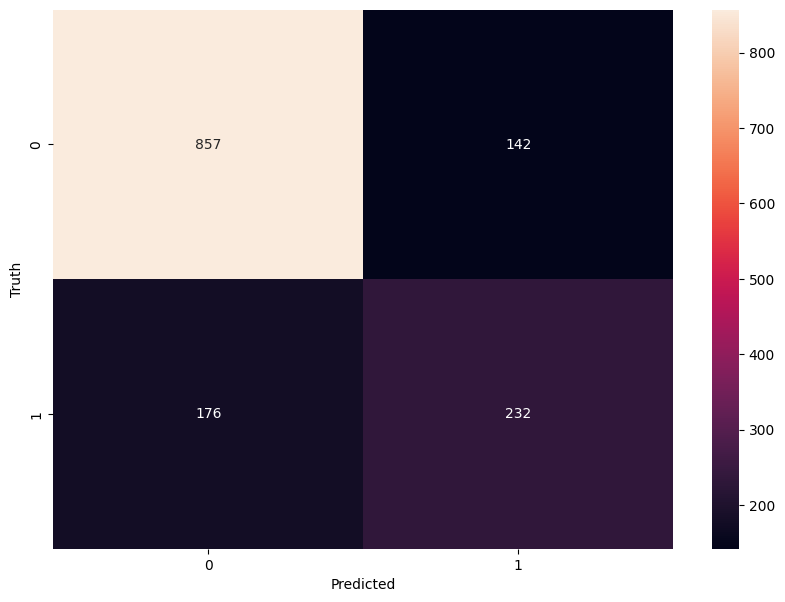

In [194]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
